<a href="https://shiroyasu.github.io/index.html">home</a> &#155;&#155; <a href="https://shiroyasu.github.io/teaching/index.html">Teaching</a> &#155;&#155; <a href="https://shiroyasu.github.io/teaching/nit.html">NIT</a> &#155;&#155; <a href="https://nbviewer.jupyter.org/github/shiroyasu/NIT2019-va/blob/master/2019S-VectorAnalysis.ipynb">2019 Vector Analysis</a>> &#155;&#155;

# ベクトル解析 <span style="color: #808080; ">Vector Analysis</span> #

## ガウスの発散定理 ##

In [2]:
JupyterImageResolution = 72;

### ベクトル場の発散の意味 ###

空間内の点$(x,y,z)$を適当に選び, 微小量 $\Delta x, \Delta y, \Delta z$ に対し, $(x\pm\Delta x, y\pm\Delta y, z\pm\Delta z)$ と表される８個の点を頂点とする直方体を考える.

この直方体の各面は $xy$平面, $yz$平面, $zx$平面に平行で, その面積は, それぞれ $4\Delta x\,\Delta y$, $4\Delta y\,\Delta z$, $4\Delta z\,\Delta x$ であり, 外向きの単位法線ベクトルは　$\pm\boldsymbol{k}$, $\pm\boldsymbol{i}$, $\pm\boldsymbol{j}$ である.


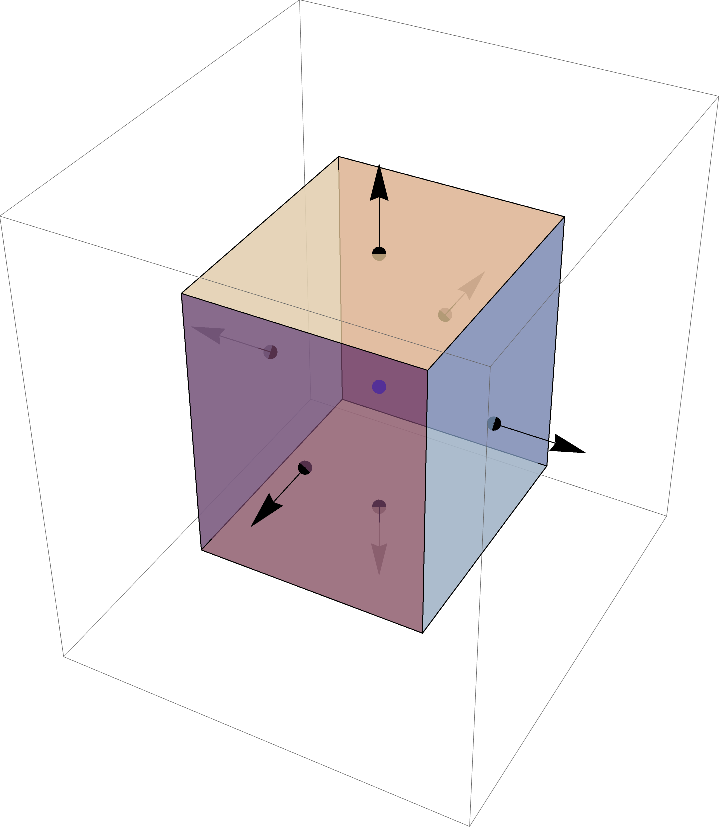

In [33]:
DeltaX:=1.3;DeltaY:=1.5;DeltaZ:=1.6;
Show[
    Graphics3D[{Opacity[0.7],Cuboid[{DeltaX,DeltaY,DeltaZ},{-DeltaX,-DeltaY,-DeltaZ}]}],
    Graphics3D[{Arrow[{{DeltaX,0,0},{DeltaX,0,0}+{1,0,0}}],Arrow[{{-DeltaX,0,0},{-DeltaX,0,0}+{-1,0,0}}],Arrow[{{0,DeltaY,0},{0,DeltaY,0}+{0,1,0}}],Arrow[{{0,-DeltaY,0},{0,-DeltaY,0}+{0,-1,0}}],Arrow[{{0,0,DeltaZ},{0,0,DeltaZ}+{0,0,1}}],,Arrow[{{0,0,-DeltaZ},{0,0,-DeltaZ}+{0,0,-1}}]}],
    Graphics3D[{PointSize[0.02],Point[{DeltaX,0,0}],Point[{-DeltaX,0,0}],Point[{0,DeltaY,0}],Point[{0,-DeltaY,0}],Point[{0,0,DeltaZ}],Point[{0,0,-DeltaZ}]}],
    Graphics3D[{PointSize[0.02],Blue,Point[{0,0,0}]}]
]

この直方体の表面を曲面$S$として, ベクトル場 $\boldsymbol{A}$ を$S$上で面積分する.
$S$は６つの面 $S_1, \ldots, S_6$ を張り合わせた曲面なので,
$$
\int_S \boldsymbol{A}\cdot d\boldsymbol{S}=\int_S \boldsymbol{A}\cdot\boldsymbol{n}\,dS
=\sum_{m=1}^6\int_{S_m} \boldsymbol{A}\cdot\boldsymbol{n}\,dS_m
$$
と考えてよい.

$\Delta x, \Delta y, \Delta z$ はとても小さい値なので, 各面における面積分の値は,
$$
\boldsymbol{A}({\rm G}_m)\cdot \boldsymbol{n}\,\Delta S_m
$$
で近似する.
ここで, ${\rm G}_m$ は各面の重心で, $\Delta S_m$ は各面の面積である.